In [155]:
import numpy as np
import matplotlib.pyplot as plt

def euler(x,y, h, y0, func):
    y[0] = y0
    for i in range(1,len(x)):
        y[i] = y[i-1] + h*func(x[i-1], y[i-1])
        #print(y[i])
    return y
        
def rk4(x,y,h,y0,func):
    y[0] = y0
    for i in range(1,len(x)):
        k1 = h*func(x[i-1], y[i-1])
        k2 = h*func(x[i-1]+h/2, y[i-1] + k1/2)
        k3 = h*func(x[i-1]+h/2, y[i-1] + k2/2)
        k4 = h*func(x[i-1]+h, y[i-1] + k3)
        y[i] = y[i-1] + (k1 + 2*k2 + 2*k3 + k4)/6
        #print(y[i])
    return y
        
def func(x,y):
    return -2*y-x**2/4+1/8

def exact(x,y):
    for i in range(0,len(x)):
        y[i] = 1/np.exp(2*x[i]) + x[i]/8 - (x[i]**2)/8
        #print(y[i])
    return y

In [156]:
h = 0.4
x = np.arange(0.0,4.0+h, h)
y0 = 1.0
y_euler = [0] * len(x)
y_exact = [0]*len(x)
y_rk4 = [0] * len(x)

In [157]:
y_euler = euler(x,y_euler,h,y0,func)

In [158]:
y_exact = exact(x,y_exact)

In [159]:
y_rk4 = rk4(x,y_rk4,h,y0,func)

# Question 2

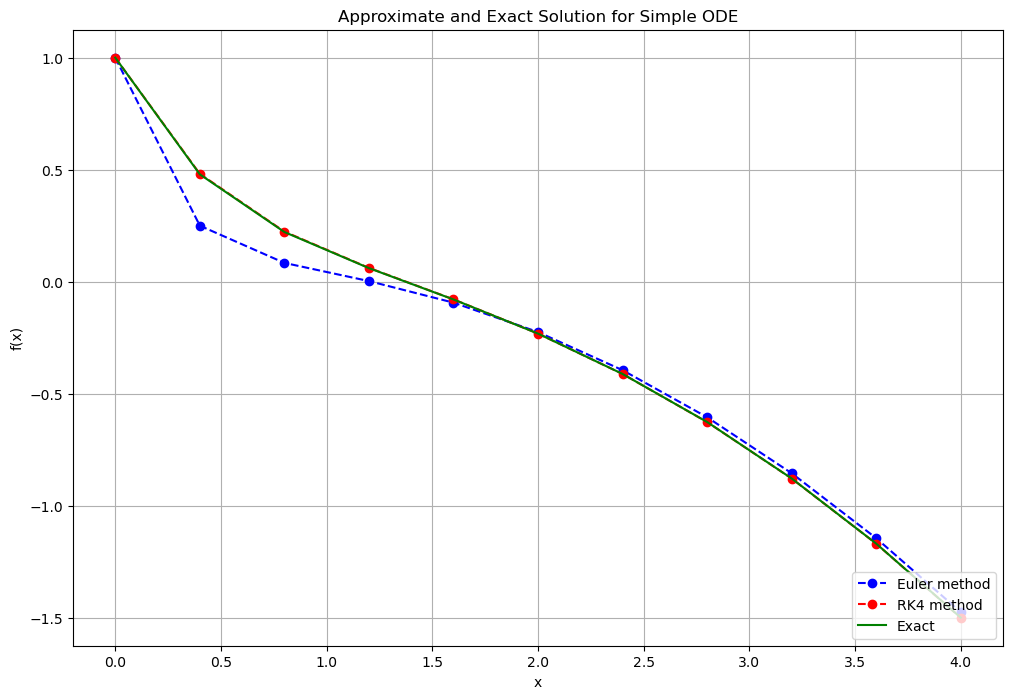

In [160]:
plt.figure(figsize = (12,8))
plt.plot(x,y_euler,'bo--', label='Euler method')
plt.plot(x,y_rk4,'ro--', label='RK4 method')
plt.plot(x, y_exact, 'g', label='Exact')
plt.title('Approximate and Exact Solution \
for Simple ODE')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()
plt.legend(loc='lower right')
plt.show()

Difference between Exact and Euler method

In [161]:
np.abs((np.array(y_exact) - np.array(y_euler)).mean())

0.02926750179121326

Difference between Exact and RK4

In [162]:
np.abs((np.array(y_exact) - np.array(y_rk4)).mean())

0.00039775895934884083

In [163]:
np.abs(y_euler[np.nonzero(x>=0.4)[0][0]]- y_exact[np.nonzero(x>=0.4)[0][0]])

0.22932896411722153

In [164]:
np.abs(y_rk4[np.nonzero(x>=0.4)[0][0]]- y_exact[np.nonzero(x>=0.4)[0][0]])

0.002191035882778525

# Question 3, finding h for euler method

In [165]:
found = False
h = 0.4
while not found:
    x = np.arange(0.0,4.0+h, h)
    y_euler = [0] * len(x)
    y_exact = [0]*len(x)
    y_euler = euler(x,y_euler,h,y0,func)
    y_exact = exact(x,y_exact)
    if np.abs(y_euler[np.nonzero(x>=0.4)[0][0]]- y_exact[np.nonzero(x>=0.4)[0][0]]) <= 0.001:
        found = True
        print(np.abs(y_euler[np.nonzero(x>=0.4)[0][0]]- y_exact[np.nonzero(x>=0.4)[0][0]]))
        break
    else:
        h = h-0.0001

0.0009786909834365032


In [166]:
print("h: ", h)

h:  0.0030000000000277582


# Question 3, finding h for rk4

In [167]:
found = False
h = 0.4
while not found:
    x = np.arange(0.0,4.0+h, h)
    y_rk4 = [0] * len(x)
    y_exact = [0]*len(x)
    y_rk4 = rk4(x,y_rk4,h,y0,func)
    y_exact = exact(x,y_exact)
    if np.abs(y_rk4[np.nonzero(x>=0.4)[0][0]]- y_exact[np.nonzero(x>=0.4)[0][0]]) <= 0.001:
        found = True
        print(np.abs(y_rk4[np.nonzero(x>=0.4)[0][0]]- y_exact[np.nonzero(x>=0.4)[0][0]]))
        break
    else:
        h = h-0.0001

0.0009997201746155815


In [168]:
print("h: ", h)

h:  0.34340000000000626


# Question 4

In [169]:
found = False
h = 0.4
h_log = []
err = []
while h >= 0.001:
    h_log.append(h)
    x = np.arange(0.0,4.0+h, h)
    y_euler = [0] * len(x)
    y_exact = [0]*len(x)
    y_euler = euler(x,y_euler,h,y0,func)
    y_exact = exact(x,y_exact)
    err.append(np.abs(y_euler[np.nonzero(x>=0.4)[0][0]]- y_exact[np.nonzero(x>=0.4)[0][0]]))
    h = h-0.001

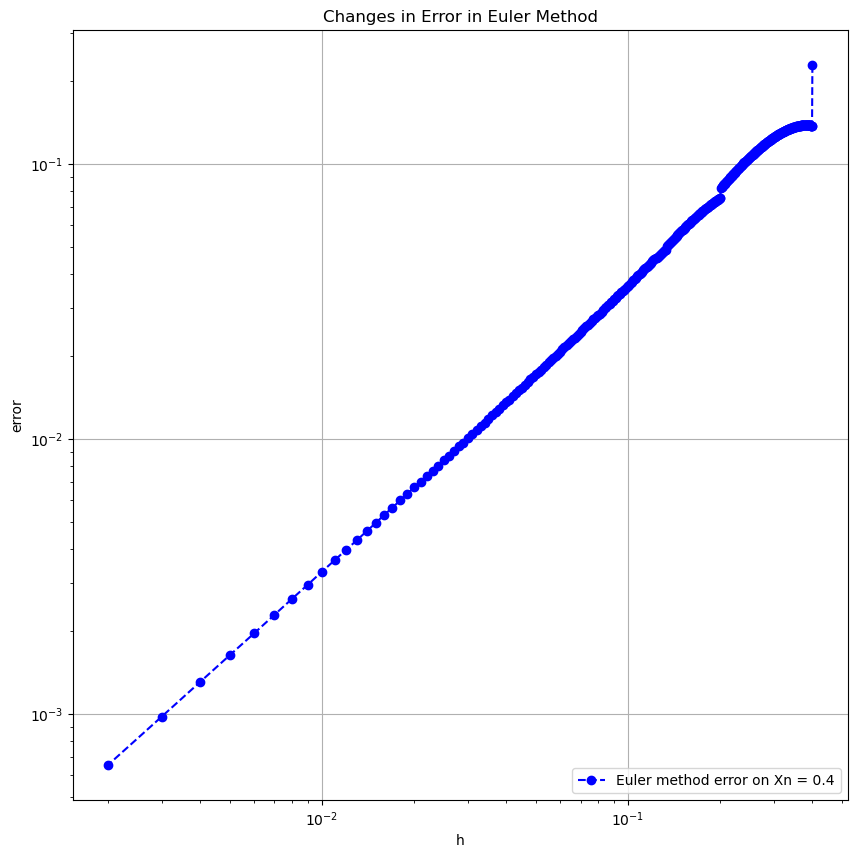

In [170]:
plt.figure(figsize = (10,10))
plt.loglog(h_log,err,'bo--', label='Euler method error on Xn = 0.4')
plt.title('Changes in Error in Euler Method')
plt.xlabel('h')
plt.ylabel('error')
plt.grid()
plt.legend(loc='lower right')
plt.show()

In [171]:
found = False
h = 0.4
h_log = []
err = []
while h >= 0.001:
    h_log.append(h)
    x = np.arange(0.0,4.0+h, h)
    y_rk4 = [0] * len(x)
    y_exact = [0]*len(x)
    y_rk4 = rk4(x,y_euler,h,y0,func)
    y_exact = exact(x,y_exact)
    err.append(np.abs(y_rk4[np.nonzero(x>=0.4)[0][0]]- y_exact[np.nonzero(x>=0.4)[0][0]]))
    h = h-0.001

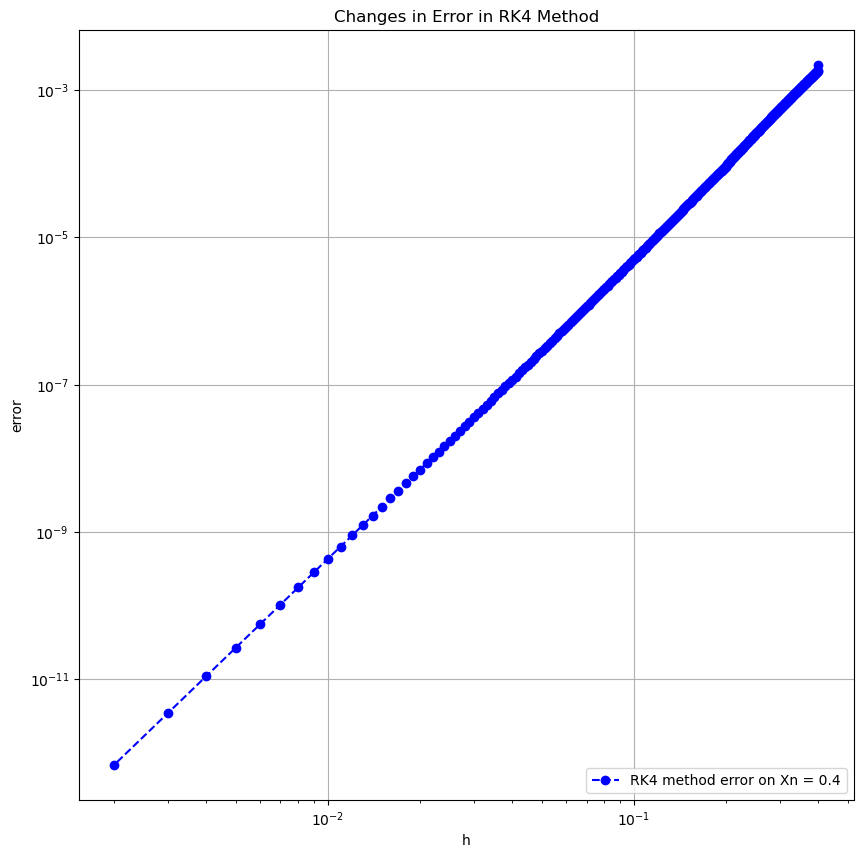

In [172]:
plt.figure(figsize = (10,10))
plt.loglog(h_log,err,'bo--', label='RK4 method error on Xn = 0.4')
plt.title('Changes in Error in RK4 Method')
plt.xlabel('h')
plt.ylabel('error')
plt.grid()
plt.legend(loc='lower right')
plt.show()

# Question 5

In [173]:
import math
def substitution(x,y,z):
    return -2*z - 5*y + math.cos(x) 

note: z = y'

In [174]:
h = 0.5
x = np.arange(0.0,10.0+h, h)
y0 = 0.0
y_prime0 = 0
y_euler = [0] * len(x)
y_exact = [0] * len(x)

In [175]:
def eulerSecond(x,y, h, y0, y_prime0, func):
    y[0] = y0
    z = [0] * len(y)
    z[0] = y_prime0
    for i in range(1,len(x)):
        z[i] = z[i-1] + h*func(x[i-1], y[i-1], z[i-1])
        y[i] = y[i-1] + h*z[i]
    return y

In [176]:
y_euler = eulerSecond(x,y_euler,h,y0,y_prime0, substitution)

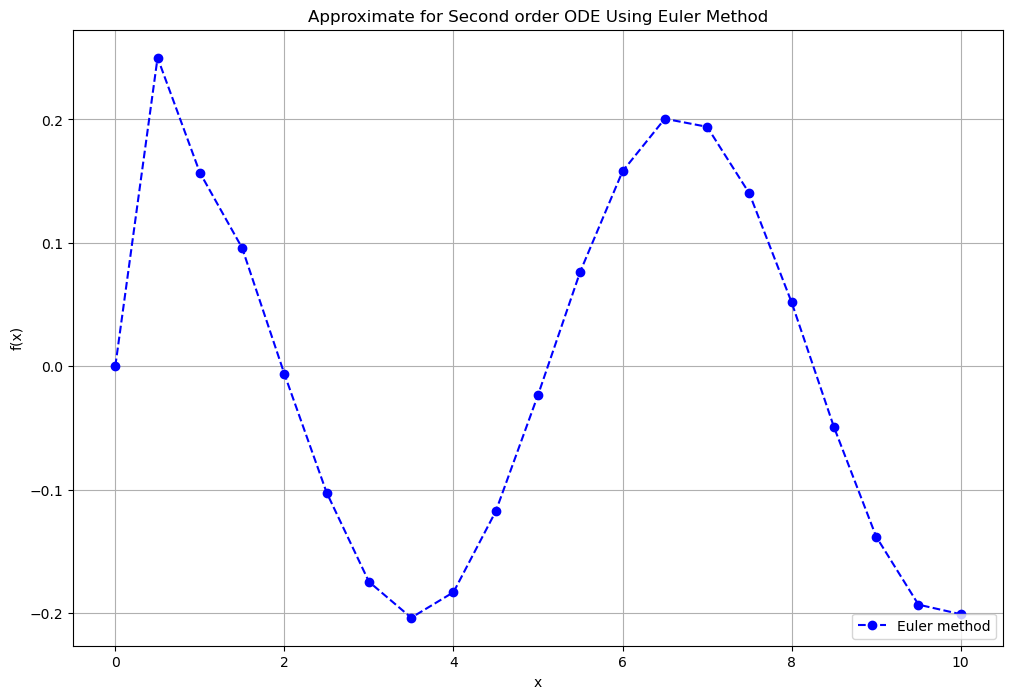

In [177]:
plt.figure(figsize = (12,8))
plt.plot(x,y_euler,'bo--', label='Euler method')
plt.title('Approximate \
for Second order ODE Using Euler Method')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()
plt.legend(loc='lower right')
plt.show()

# Question 6

In [178]:
def secondODEexact(x,y):
    for i in range(0,len(x)):
        y[i] = -np.exp(-x[i])*math.cos(2*x[i]) - 0.5*np.exp(-x[i])*math.sin(2*x[i]) + math.cos(x[i])
    return y

In [179]:
y_exact = secondODEexact(x,y_exact)

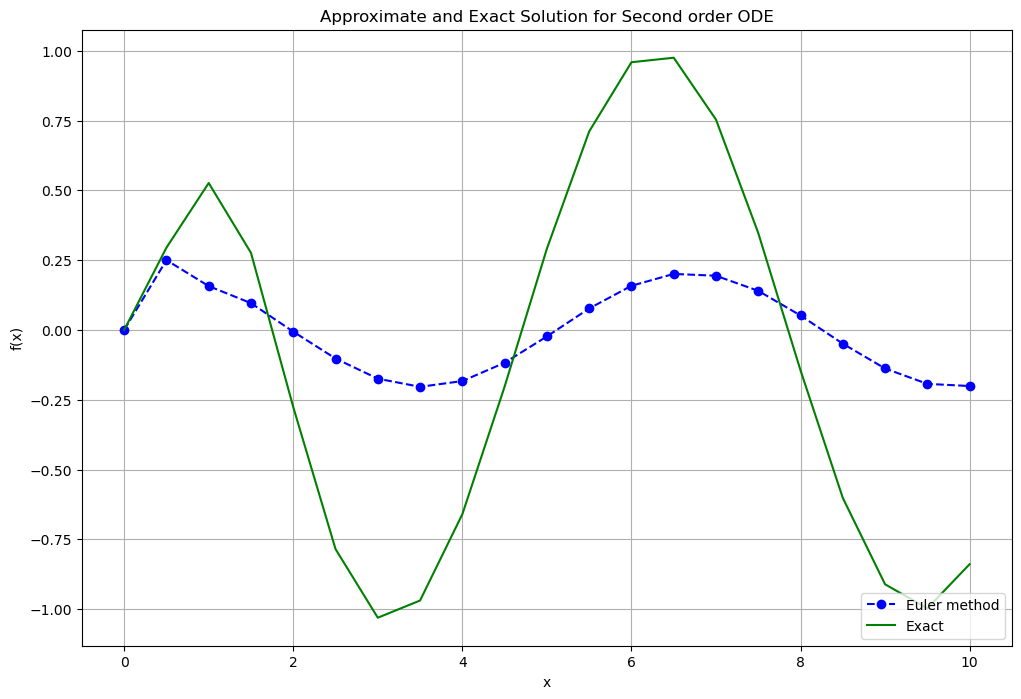

In [180]:
plt.figure(figsize = (12,8))
plt.plot(x,y_euler,'bo--', label='Euler method')
plt.plot(x, y_exact, 'g', label='Exact')
plt.title('Approximate and Exact Solution \
for Second order ODE')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()
plt.legend(loc='lower right')
plt.show()

## Experimentation on step size

In [181]:
h = 0.001
x = np.arange(0.0,10.0+h, h)
y0 = 0.0
y_prime0 = 0
y_euler = [0] * len(x)
y_exact = [0] * len(x)
y_euler = eulerSecond(x,y_euler,h,y0,y_prime0, substitution)
y_exact = secondODEexact(x,y_exact)

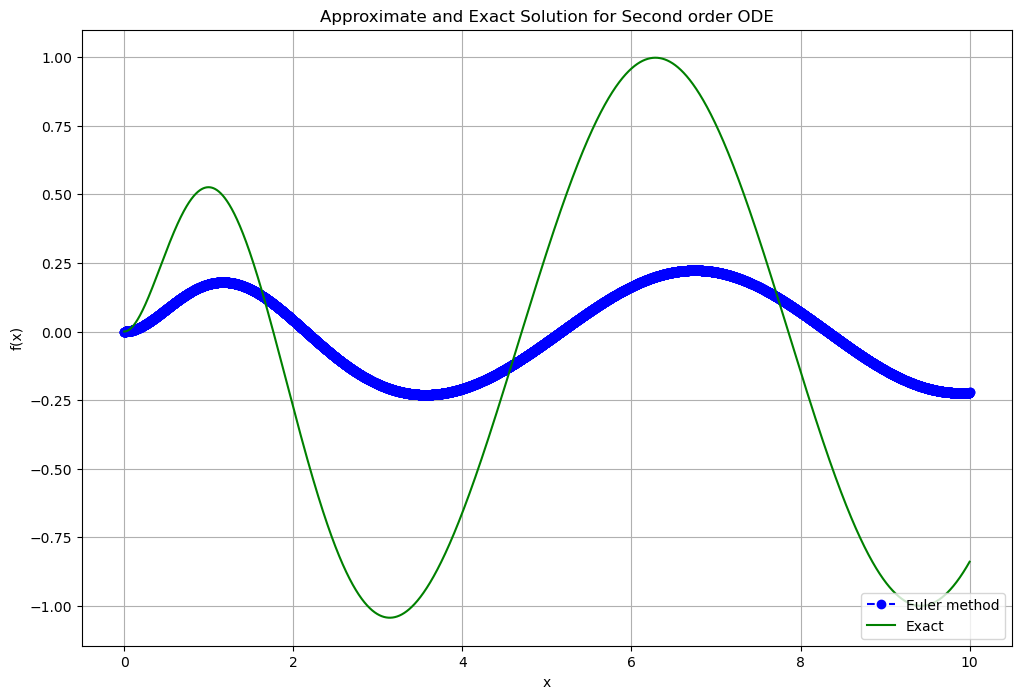

In [182]:
plt.figure(figsize = (12,8))
plt.plot(x,y_euler,'bo--', label='Euler method')
plt.plot(x, y_exact, 'g', label='Exact')
plt.title('Approximate and Exact Solution \
for Second order ODE')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()
plt.legend(loc='lower right')
plt.show()